<a href="https://colab.research.google.com/github/aicampg/ml4dev-sklearn/blob/main/Assignment3_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Data Set


### Import libraries
We need to import  all the modules, functions  before using them

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


To make sure that every single line will be  printed, even if they're in the same cell, we can use thf ollowing config:

# Importing your data

After downloading the dataset files from UCI, you can either move them to the local directory you want to work in or to your Colab directory in your google drive and work on them in the cloud. The path we choose is for the latter choice. Here are the four datasets we chose to work on for this assignment:
* **Breast Cancer Data Set**


Life study; 286 data points (instances); 9 features (attributes)

**Attribute Information:**

1. **Class**: no-recurrence-events, recurrence-events
2. **age**: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
3. **menopause**: lt40, ge40, premeno.
4. **tumor-size**: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
5. **inv-nodes**: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
6. **node-caps**: yes, no.
7. **deg-malig**: 1, 2, 3.
8. **breast**: left, right.
9. **breast-quad**: left-up, left-low, right-up, right-low, central.
10. **irradiat**: yes, no.


In [13]:
input_path = '/content/gdrive/My Drive/ML_Course/'

## Working with Breast cancer dataset
target_dataset = pd.read_csv(input_path+'breast-cancer.data', sep=',', 
                             names=["Class","age",
                                    "menopause", "tumor-size",
                                    "inv-nodes","node-caps", 
                                    "deg-malig", "breast",
                                    "breast-quad", "irradiat"
                                    ])
target_dataset.shape
target_dataset




,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [14]:
target_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [15]:
### Preparing data
# converting strings in categorical features to integers
cat_columns = target_dataset.select_dtypes(['object']).columns
target_dataset[cat_columns] = target_dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])

# replace infinity values with Nans
# Fill Nans with 0
target_dataset = target_dataset.replace([np.inf, -np.inf], np.nan)
target_dataset = target_dataset.fillna(0)
target_dataset.head

<bound method NDFrame.head of      Class  age  menopause  ...  breast  breast-quad  irradiat
0        0    0          0  ...       0            0         0
1        0    1          0  ...       1            1         0
2        0    1          0  ...       0            0         0
3        0    2          1  ...       1            2         0
4        0    1          0  ...       1            3         0
..     ...  ...        ...  ...     ...          ...       ...
281      1    0          0  ...       0            2         0
282      1    0          0  ...       0            2         1
283      1    2          1  ...       1            2         0
284      1    1          1  ...       0            0         0
285      1    3          1  ...       0            0         0

[286 rows x 10 columns]>

In [18]:
target_dataset[cat_columns]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast-quad,irradiat
0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,1,0
2,0,1,0,1,0,0,0,0,0
3,0,2,1,2,0,0,1,2,0
4,0,1,0,3,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...
281,1,0,0,0,0,0,0,2,0
282,1,0,0,1,0,0,0,2,1
283,1,2,1,1,0,0,1,2,0
284,1,1,1,0,3,0,0,0,0


### Summarize the Dataset



*   Dimensions of the dataset.
*   Describtion of the dataset.

  Statistical summary of all attributes.
  
*   Class Distribution



**Statistical Summary**

In [19]:
# descriptions

print(target_dataset.describe())

            Class         age   menopause  ...      breast  breast-quad    irradiat
count  286.000000  286.000000  286.000000  ...  286.000000   286.000000  286.000000
mean     0.297203    1.821678    0.500000  ...    0.468531     1.356643    0.237762
std      0.457828    1.114349    0.547723  ...    0.499883     1.286396    0.426459
min      0.000000    0.000000    0.000000  ...    0.000000     0.000000    0.000000
25%      0.000000    1.000000    0.000000  ...    0.000000     0.000000    0.000000
50%      0.000000    2.000000    0.000000  ...    0.000000     1.500000    0.000000
75%      1.000000    3.000000    1.000000  ...    1.000000     2.000000    0.000000
max      1.000000    5.000000    2.000000  ...    1.000000     5.000000    1.000000

[8 rows x 10 columns]


In [ ]:
target_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
Class          286 non-null int64
age            286 non-null int64
menopause      286 non-null int64
tumor-size     286 non-null int64
inv-nodes      286 non-null int64
node-caps      286 non-null int64
deg-malig      286 non-null int64
breast         286 non-null int64
breast-quad    286 non-null int64
irradiat       286 non-null int64
dtypes: int64(10)
memory usage: 22.5 KB


In [20]:
# class distribution
print(target_dataset.groupby('Class').size())
#dataset.groupby('class').describe()

Class
0    201
1     85
dtype: int64


In [ ]:
# datatype
target_dataset.dtypes

Class          int64
age            int64
menopause      int64
tumor-size     int64
inv-nodes      int64
node-caps      int64
deg-malig      int64
breast         int64
breast-quad    int64
irradiat       int64
dtype: object

### Data Visualization





*   Univariate plots 

  Better understanding of each attribute.

  Plots of each individual variable.
  
  This gives us a much clearer idea of the distribution of the input attributes. For example if variable have Gaussian distribution then we can choose algorithms that use this assumption.
   
*   Multivariate plots 

  Better understand the relationships between attributes.
  
  Interactions between the variables.
  
  Correlation between variables








/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

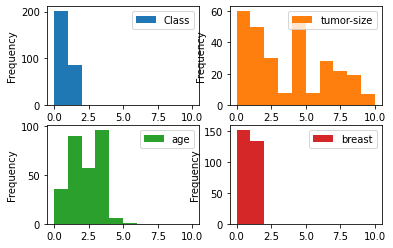

In [ ]:
# two different ways of plots 
#dataset.iloc[:,:-2].hist(bins=20,figsize=(9,7),grid=False)
target_dataset[["Class","tumor-size","age","breast"]].plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

## Building classification models
Among the available classification methods in Python, we focus on the following five to build classification models of tissue type of the cancer cell lines in our dataset:

*   **K- nearest neighbour**
*   Logistic regression
*   Naive Bayes
*   Random forest




### Splitting data to training and testing sets

If we use one of our labeled fruit examples in the data that we use to train the classifier, we can't also use that same irish data as a test sample to also evaluate the classifier.

The machine learning Algorithm needs to work well on any input sample (Training Set), any new pieces of data that we might see in the future(Test Set).



To investigate performance of our model, we need to split the data to training and testing sets(validation set). This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(target_dataset, target_dataset['Class'], test_size=0.30, random_state=5)


In [22]:
print(f'train: {X_train.size}')
print(f'test: {X_test.size}')

train: 2000
test: 860


## K nearest neighbour(KNN)
K nearest neighbour uses a distance metric like Euclidean distance to identity similarity of target data point (sample) in test or validation set to the data points (samples) in the trainign set. Then based on the user specified k, it finds the k closest points (samples) to the target data point. Afterward, it chooses the most frequent label among the k closes points (majority voting) as the class label of the target sample. The class labels can be also assigned based on weighted voting of the k closest data points to the data point.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [24]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test.values)

[0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0]
[0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0]


In [25]:
from sklearn import metrics

print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average=None))

Confusion matrix of the predictions:
 [[54  2]
 [11 19]]
accuracy of the predictions: 0.8488372093023255
precision [0.83076923 0.9047619 ]


In [26]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 0.8488372093023255
blanced accuracy of the predictions: 0.7988095238095239
MCC of the predictions: 0.6629988059644405
Confusion matrix of the predictions: [[54  2]
 [11 19]]


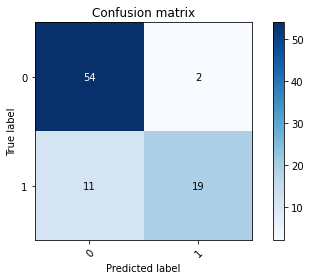

In [27]:


from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
 
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes= target_dataset['Class'].unique(),
                      title='Confusion matrix')

plt.show()


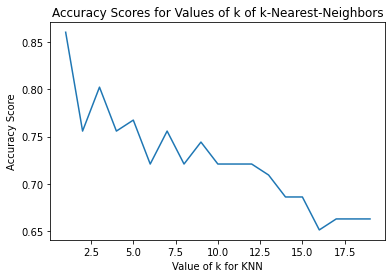

In [28]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## Logistic regression



In [29]:
from sklearn.linear_model import LogisticRegression as LR

# Initialize our classifier
#logreg = LogisticRegression()
logreg = LR()

# Fitting the model with the data
logreg.fit(X_train, y_train)

# prediction in test set
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

accuracy of the predictions: 1.0
blanced accuracy of the predictions: 1.0
MCC of the predictions: 1.0
Confusion matrix of the predictions: [[56  0]
 [ 0 30]]
Confusion matrix of the predictions:
 [[56  0]
 [ 0 30]]


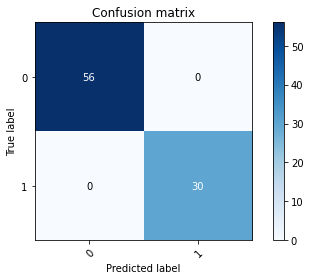

In [30]:
from sklearn import metrics

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=[0,1],
                      title='Confusion matrix')

plt.show()


# Building classification models

Among the available classification methods in Python, we focus on the following five to build classification models in our dataset:

* Logistic regression
* K- nearest neighbour
* **Naive Bayes**
* Random forest

## Naive Bayes


In [31]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0]


In [ ]:
gnb = GaussianNB()

# Fitting the model with the data
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Testing the model on the testing set:

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0]


In [ ]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))

accuracy of the predictions: 1.0
blanced accuracy of the predictions: 1.0
MCC of the predictions: 1.0
Confusion matrix of the predictions: [[56  0]
 [ 0 30]]




# Building classification models

Among the available classification methods in Python, we focus on the following five to build classification models in our dataset:

* Logistic regression
* K- nearest neighbour
* Naive Bayes
* **Random forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RFclf = RandomForestClassifier(max_depth=2, random_state=0)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test)
print(RFclf.feature_importances_)

[0.57487312 0.02748206 0.00851529 0.05754837 0.08925466 0.06039606
 0.12891534 0.00935674 0.02166158 0.02199679]


In [ ]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))


accuracy of the predictions: 1.0
blanced accuracy of the predictions: 1.0
MCC of the predictions: 1.0
Confusion matrix of the predictions: [[56  0]
 [ 0 30]]
Confusion matrix of the predictions:
 [[56  0]
 [ 0 30]]


accuracy of the predictions: 1.0
blanced accuracy of the predictions: 1.0
MCC of the predictions: 1.0
Confusion matrix of the predictions: [[56  0]
 [ 0 30]]


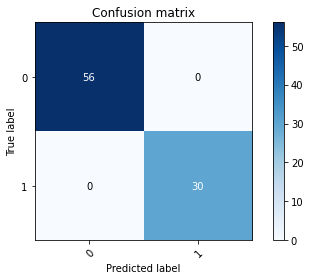

In [ ]:
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=[0,1],
                      title='Confusion matrix')

plt.show()


In [32]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(target_dataset, target_dataset['Class'], test_size=0.30, random_state=5)


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

accuracy of the predictions: 1.0
blanced accuracy of the predictions: 1.0
MCC of the predictions: 1.0
Confusion matrix of the predictions: [[56  0]
 [ 0 30]]


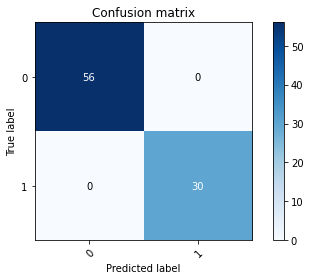

In [33]:
from sklearn import metrics
print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))
print("MCC of the predictions:", metrics.matthews_corrcoef(y_test, y_pred))
print("Confusion matrix of the predictions:", metrics.confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=[0,1],
                      title='Confusion matrix')


In [ ]:
target_dataset[["Class","tumor-size","age","breast"]].plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [38]:
import seaborn as sns
#sns.pairplot(target_dataset[["Class","tumor-size","age","breast"]])
target_dataset.corr()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,1.000000,-0.102081,-0.048973,-0.116745,0.268118,0.241480,0.299400,-0.058646,-0.067409,0.193912
age,-0.102081,1.000000,0.526010,0.049594,-0.044820,0.062569,-0.053331,-0.051052,-0.006881,-0.124588
menopause,-0.048973,0.526010,1.000000,-0.057540,-0.030196,0.077626,0.008678,-0.076891,0.014940,-0.075108
tumor-size,-0.116745,0.049594,-0.057540,1.000000,-0.086986,-0.053786,-0.060664,0.018323,-0.093763,0.032165
inv-nodes,0.268118,-0.044820,-0.030196,-0.086986,1.000000,0.529805,0.297600,0.049513,-0.076632,0.347912
node-caps,0.241480,0.062569,0.077626,-0.053786,0.529805,1.000000,0.196549,-0.052937,-0.042297,0.380206
deg-malig,0.299400,-0.053331,0.008678,-0.060664,0.297600,0.196549,1.000000,-0.052861,-0.022143,0.208099
breast,-0.058646,-0.051052,-0.076891,0.018323,0.049513,-0.052937,-0.052861,1.000000,0.137556,0.018761
breast-quad,-0.067409,-0.006881,0.014940,-0.093763,-0.076632,-0.042297,-0.022143,0.137556,1.000000,-0.046382
irradiat,0.193912,-0.124588,-0.075108,0.032165,0.347912,0.380206,0.208099,0.018761,-0.046382,1.000000
